## Live demo

In [11]:
import pandas as pd
import numpy as np

from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:

model = keras.models.load_model('model/')

In [13]:
PATH_DEMO = "../data/livedemo/"

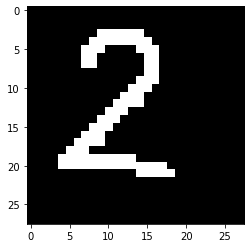

In [14]:

img = mpimg.imread(PATH_DEMO + 'Untitled.png')
imgplot = plt.imshow(img)
plt.show()


In [15]:
import cv2

image = cv2.imread(PATH_DEMO +'2.png',0)
image.shape



(100, 100)

In [16]:
resized_image = cv2.resize(image,(28,28)).astype(np.float32)

In [17]:
def labels():
    res = []
    for i in range(0, 28*28):
        res.append("pixel" + str(i))
    return res


df = pd.DataFrame([resized_image.flatten()],columns=labels())

In [18]:
to_predict = df.values
to_predict = to_predict/255
to_predict = to_predict.reshape((1,28, 28,1))

In [19]:
model.predict_classes(to_predict) ## does not work with tensorflow 2.5.0, working version is 2.4.0

array([2], dtype=int64)

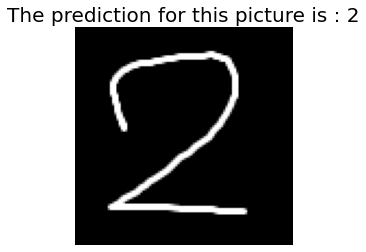

In [20]:
imgplot = plt.imshow(image, cmap="gist_gray")
plt.axis('off')
plt.title("The prediction for this picture is : " + str(model.predict_classes(to_predict)[0]), fontsize=20)
plt.show()